In [161]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv("./mnist_train.csv")

In [137]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df.shape

(60000, 785)

In [145]:
data = np.array(df)
r,c=data.shape
m,n=data.shape

np.random.shuffle(data)

test = data[0:1000].T
x_test = test[1:]/255
y_test = test[0]

train = data[1000:r].T
X_train = train[1:c]/255
Y_train = train[0]



In [146]:
no_of_pixels = X_train[:,0].shape[0]
print(no_of_pixels)

784


In [150]:
def initialize_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    res = np.exp(Z)/sum(np.exp(Z))
    return res
                         
def forward_propagation(W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2


def ReLU_derivative(Z):
    return Z>0
    
def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y = one_hot_encoding(Y)
    dZ2= A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1/m *dZ1.dot(X.T) 
    db1 = 1/m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

def gradient_descent(X,Y,epochs,learning_rate):
    W1,b1,W2,b2 = initialize_parameters()
    for i in range(epochs):
        # print("A",b1)
        Z1,A1,Z2,A2 = forward_propagation(W1,b1,W2,b2,X)
        # print("B",b1)
        dW1,db1,dW2,db2 = backward_propagation(Z1,A1,Z2,A2,W1,W2,X,Y)
        # print("C",db1)
        W1,b1,W2,b2 = update_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2,learning_rate)
        # print("D",b1)
        if(i%50==0):
            print("epoch: ",i,"\tAccuracy: ",accuracy(calc_predit(A2),Y))
    return W1,b1,W2,b2

def calc_predit(A2):
    return np.argmax(A2,0)

def accuracy(predictions,Y):
    return np.sum(predictions==Y)/Y.size
    
W1,b1,W2,b2 = gradient_descent(X_train,Y_train,500,0.1)

epoch:  0 	Accuracy:  0.08091525423728814
epoch:  50 	Accuracy:  0.49933898305084745
epoch:  100 	Accuracy:  0.6805593220338984
epoch:  150 	Accuracy:  0.7459152542372881
epoch:  200 	Accuracy:  0.780728813559322
epoch:  250 	Accuracy:  0.8023898305084746
epoch:  300 	Accuracy:  0.8177796610169491
epoch:  350 	Accuracy:  0.8302542372881356
epoch:  400 	Accuracy:  0.8395593220338983
epoch:  450 	Accuracy:  0.8462881355932204


In [159]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = calc_predit(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


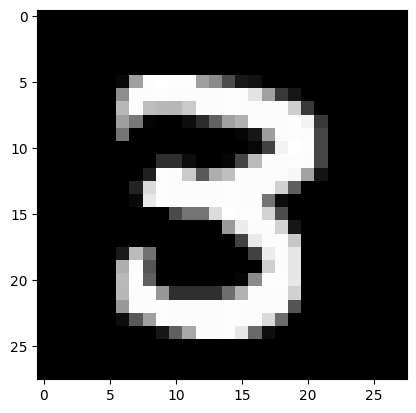

In [163]:
test_prediction(10, W1, b1, W2, b2)